In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

large = 22; med = 20; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
%matplotlib inline

df = pd.read_pickle('df_S300_featurized')

In [2]:
df = df.replace([np.inf, -np.inf, np.nan], 0)
df_X = df.drop('Input Data|S_300_atom',axis=1)
a = {}
for x in df_X.columns:
    if 'ChemEnvSiteFingerprint|GaussianSymmFunc' in x:
        a[x] = 'GaussianSymmFunc|'+x[39:]
df_X = df_X.rename(a,axis=1)

df_Y = df[['Input Data|S_300_atom']]

df_X=(df_X-df_X.min())/(df_X.max()-df_X.min())
#df_Y=(df_Y-df_Y.min())/(df_Y.max()-df_Y.min())
df_X = df_X.replace([np.inf, -np.inf, np.nan], 0)

cross_mi = pd.read_pickle('Features_cross_OLD')
S300_mi = pd.read_pickle('Features_S300')
a = []
for x in cross_mi.index:
    if x not in S300_mi.index:
        a.append(x)
        
cross_mi = cross_mi.drop(a,axis=0).drop(a,axis=1)

def get_features(n,p=2,c=0.2):

    score = cross_mi.copy()
    for i in score.index:
        row = score.loc[i,:]
        score.loc[i,:] = S300_mi[i] /(row**p+c)

    first_feature = S300_mi.nlargest(1).index[0]
    score = score.drop(first_feature,axis=0)
    feature_set = [first_feature]

    for _ in range(n-1):
        next_feature = score[feature_set].min(axis=1).idxmax(axis=0)
        feature_set.append(next_feature)
        score = score.drop(next_feature,axis=0)
    #print(feature_set)
    return feature_set


In [3]:
features = get_features(3,p=5,c=1e-7)
print(features)
labels = ['Average bond length','Crystal system','Valence range']
x = df[features].values
y = df[['Input Data|S_300_atom']].values

['AverageBondLength|mean Average bond length', 'GlobalSymmetryFeatures|crystal_system_int', 'ElementProperty|MagpieData range NValence']


# 1D Visualisation

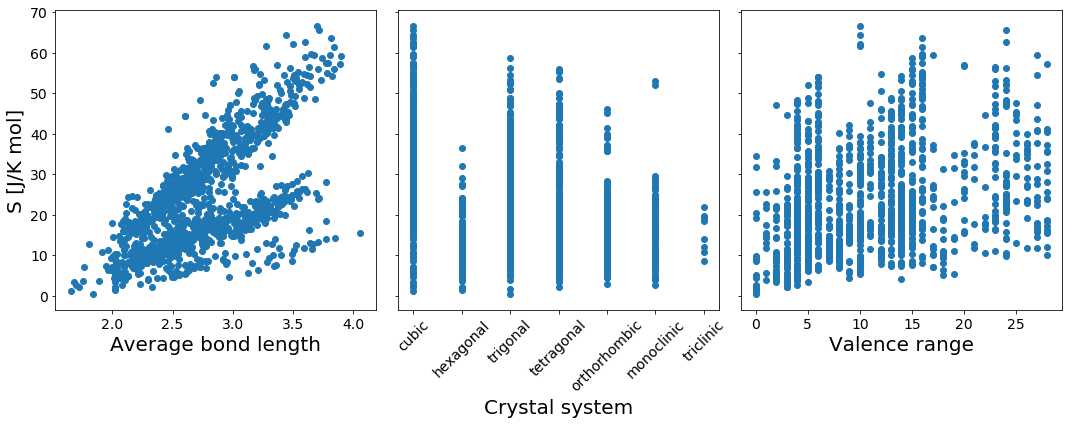

In [31]:
fig,ax = plt.subplots(1,3,figsize=(15,6),sharey=True)
for i,l in enumerate(labels):
    ax[i].scatter(x[:,i],y)
    ax[i].tick_params(labelsize=14)
    ax[i].set_xlabel(l)

fig.tight_layout()
ax[0].set_ylabel('S [J/K mol]')
ax[1].set_xticklabels(['o','cubic','hexagonal','trigonal','tetragonal', "orthorhombic",'monoclinic','triclinic'],rotation=45)
fig.tight_layout()
fig.savefig('RR_vis.pdf')

# 2D Visualisation

Text(0, 0.5, 'Crystal system')

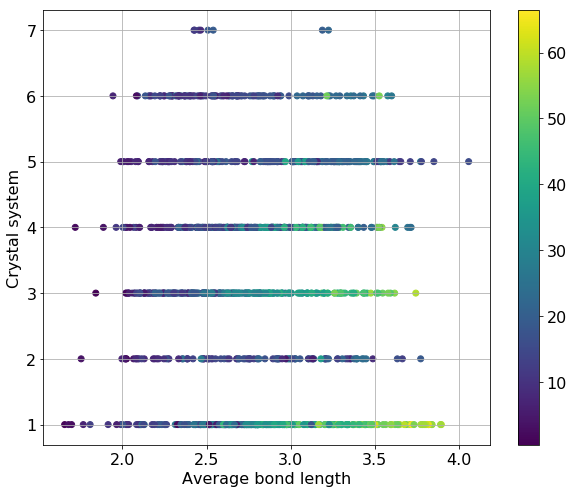

In [53]:
fig,ax = plt.subplots(figsize=(10,8))
ax.grid()
plt.scatter(x[:,0],x[:,1],c=y.reshape((-1,)).tolist())
plt.colorbar()
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])

Text(0, 0.5, 'Valence range')

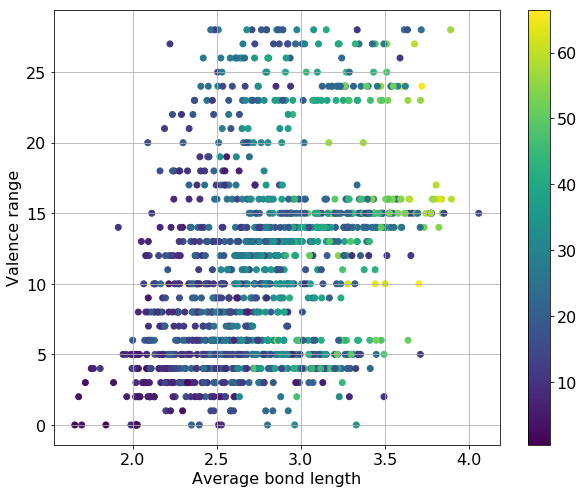

In [54]:
fig,ax = plt.subplots(figsize=(10,8))
ax.grid()
plt.scatter(x[:,0],x[:,2],c=y.reshape((-1,)).tolist())
plt.colorbar()
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[2])

# 3D Visualisation

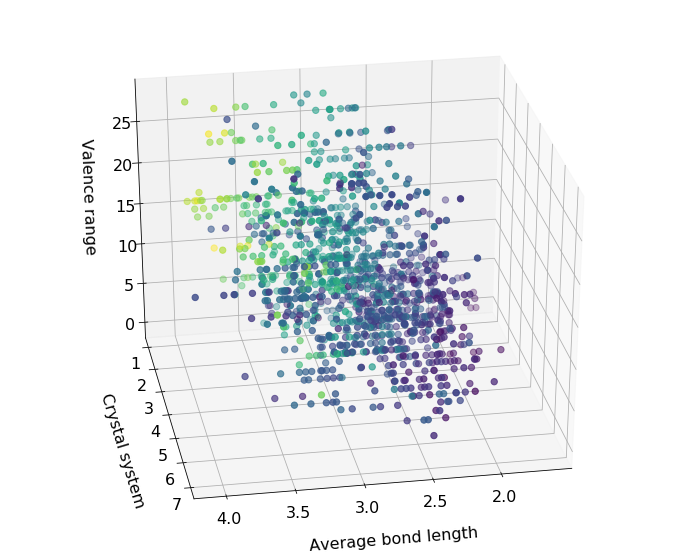

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2],c=y.reshape((-1,)).tolist(),s=40)
#lt.colorbar()
#ax.set_xlim([-6,4])
#ax.set_ylim([-6,4])
#x.set_zlim([-10,10])
ax.view_init(elev=30, azim=80)
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20